In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# create an Observables object to store information for derivatives

pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'z_reio', 'sigma'])
centers = np.array([0.02230,  0.1188,  0.6774,  2.142e-9, 0.9619, 8.8, 0.0])
steps = np.array([0.0002230,  0.001188,  0.006774,  2.142e-11, 0.009619, 0.088, 1.05e-26])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

In [15]:
# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 2000,
                   'lensing': 'yes'}
# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

In [16]:
classy_template

{'output': 'tCl pCl lCl',
 'l_max_scalars': 2000,
 'lensing': 'yes',
 'omega_b': 0.0224,
 'omega_cdm': 0.12,
 'h': 0.674}

In [17]:
# generate the fiducial cosmology
obs.compute_cosmo(key='CLASS_fiducial', classy_dict=classy_template)

In [20]:
# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_CLASS_left', classy_dict=classy_left)
    obs.compute_cosmo(key=par + '_CLASS_right', classy_dict=classy_right)

In [25]:
obs.cosmos['CLASS_fiducial'].T_cmb()
#obs.cosmos['omega_b_CLASS_left'].T_cmb()

2.7255

In [30]:
fid11 = obs.cosmos['CLASS_fiducial']

In [37]:
len(fid11.lensed_cl()['tt'])

2001

In [8]:
example_Planck = CMB_Primary(
    theta_fwhm=[7.], sigma_T=[33.], sigma_P=[56.],
    f_sky=1.0, l_min=2, l_max=2000)



In [9]:
fisher = example_Planck.get_fisher(obs)

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$']


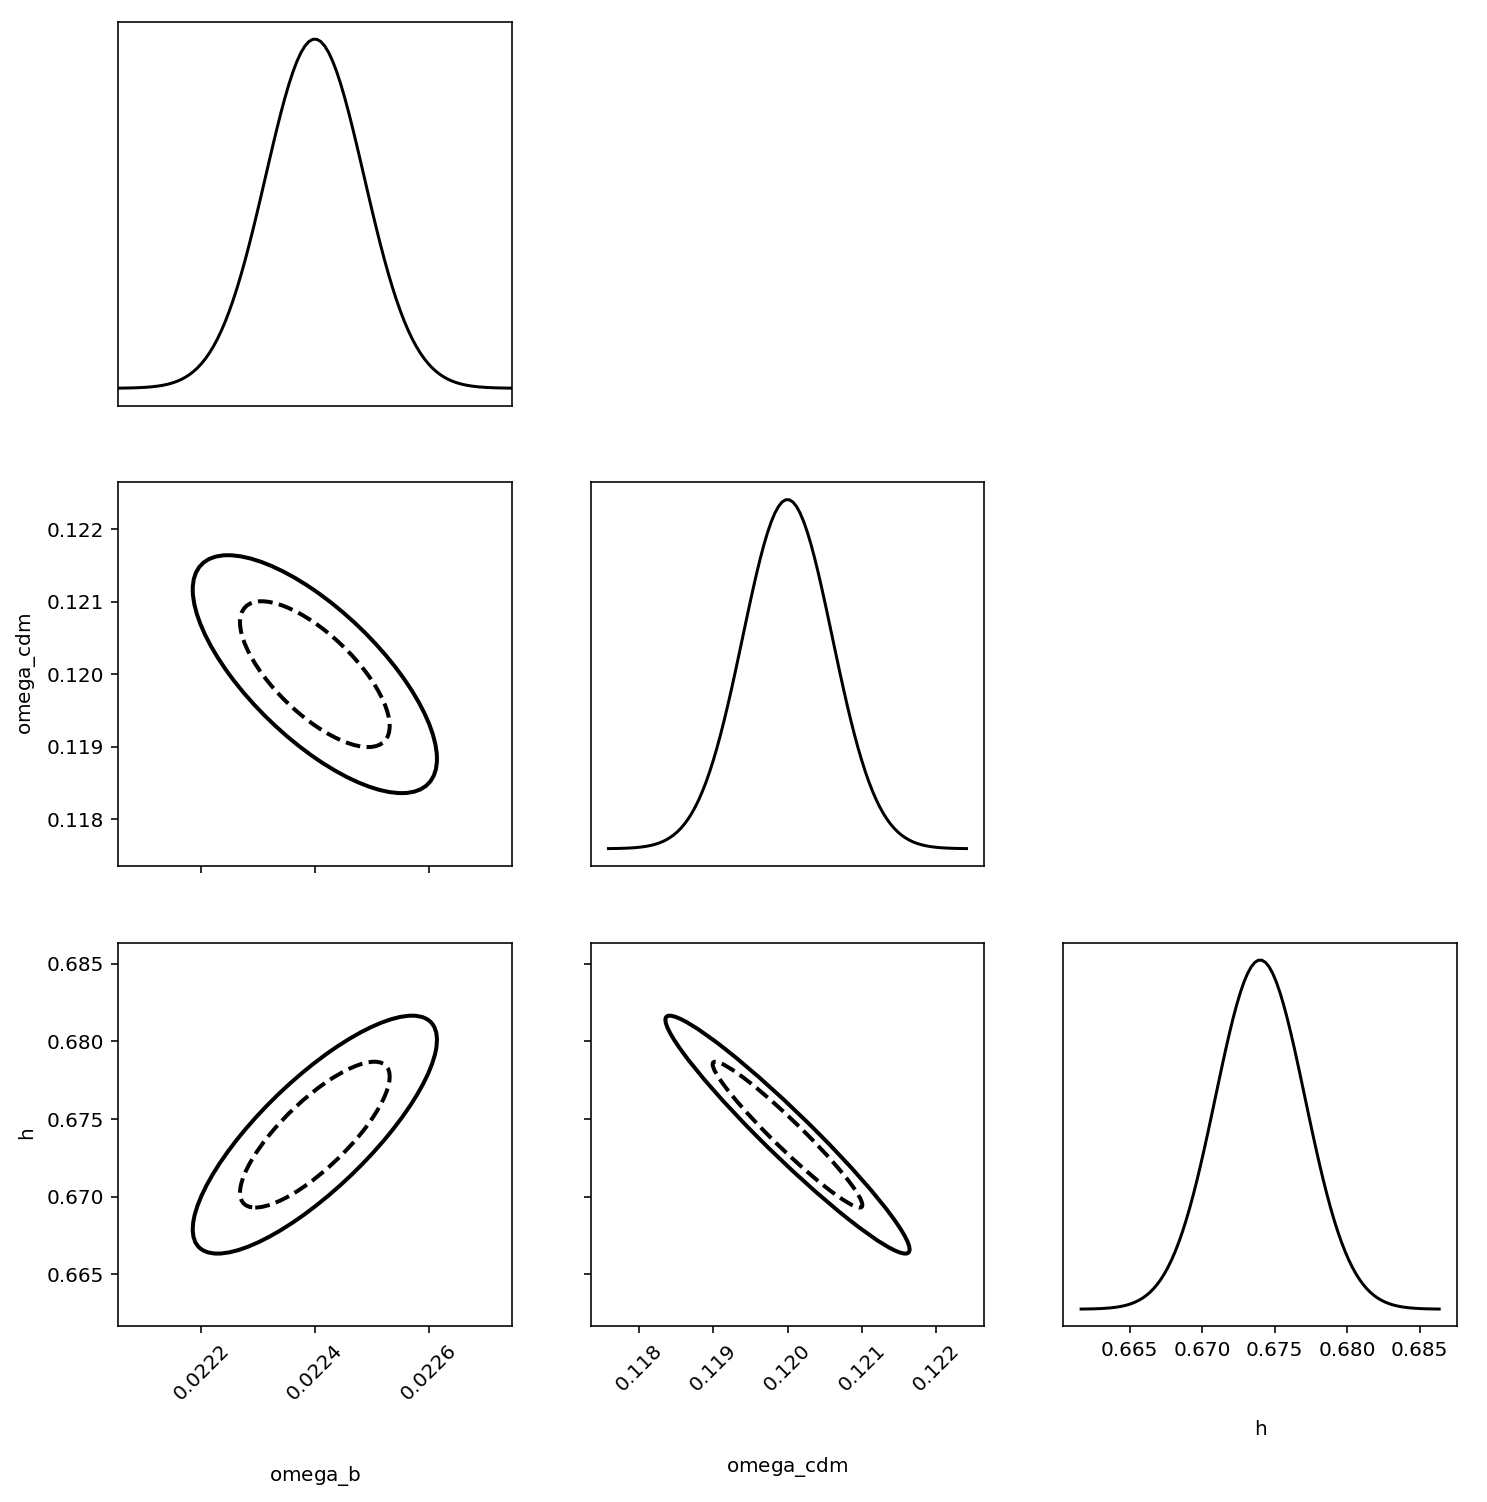

In [10]:
cov = np.linalg.inv(fisher)
fishchips.util.plot_triangle(obs, cov);

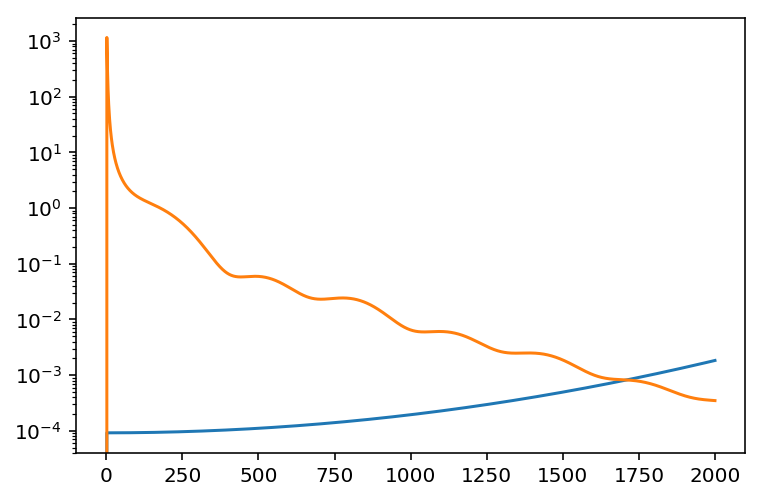

In [11]:


plt.plot(example_Planck.noise_T)
plt.plot(obs.cosmos['CLASS_fiducial'].lensed_cl()['tt'] * (2.72*1e6)**2)
plt.yscale('log')



In [13]:
obs.parameters

array(['omega_b', 'omega_cdm', 'h'], dtype='<U9')

In [14]:
obs.fiducial


array([0.0224, 0.12  , 0.674 ])

In [15]:
params = obs.parameters
pind = dict(zip(params, list(range(len(params)))))

In [16]:
pind

{'omega_b': 0, 'omega_cdm': 1, 'h': 2}